 # Bias-Variance Tradeoff in the Logistic Regression



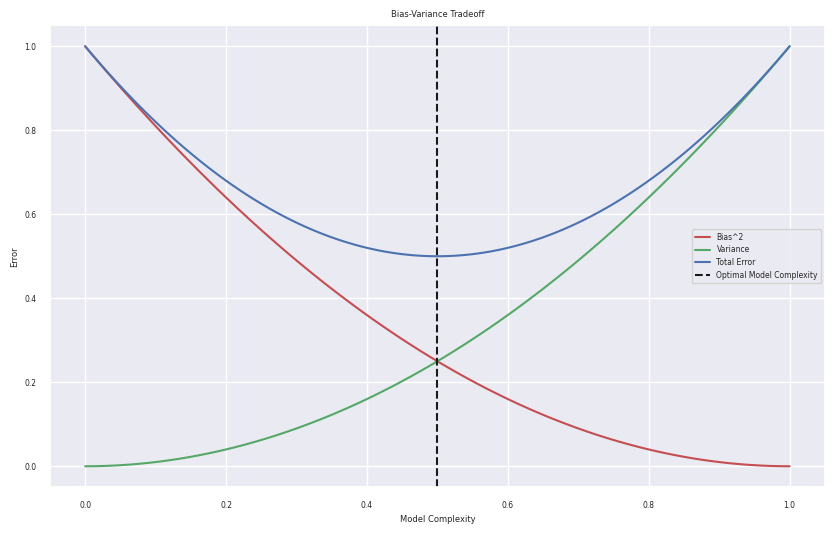

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of model complexities (for demonstration)
model_complexity = np.linspace(0, 1, 100)

# Simulated bias^2 - this decreases as model complexity increases
bias_squared = (1 - model_complexity)**2

# Simulated variance - this increases as model complexity increases
variance = model_complexity**2

# Simulated total error - this is the sum of bias^2 and variance, typically U-shaped
total_error = bias_squared + variance

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(model_complexity, bias_squared, 'r-', label='Bias^2')
plt.plot(model_complexity, variance, 'g-', label='Variance')
plt.plot(model_complexity, total_error, 'b-', label='Total Error')

# Add vertical line for optimal model complexity (for illustration, let's assume it's at 0.5)
plt.axvline(x=0.5, color='k', linestyle='--', label='Optimal Model Complexity')

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()

plt.grid(True)
plt.show()

Bias is the difference between the average prediction of our model and the true value. And variance refers to the variability of the model prediction. We need to consider both bias and variance when we do the model prediction.

*   Bias: High bias leads that the model is too simple and the ability to capture the data's relationships could be weak, leading to underfitting.
*   Variance: High variance means the model is too complex, fitting the training data too closely and probably performing poorly on new data which might makes overfitting.

However, we could not make the bias and variance both smallest at the same time. There exists a bias-variance tradeoff. In layman's word, when we are decreasing the bias and at the same time we are increasing the variance. Also, when we try to decrease variance, the bias will increases. Our goal is to find a reasonable as lowest as possible value of bias and variance to decrease the total error. In logistic regression, we can manage the bias and variance by adjusting the complexity of the model (e.g., feature selection or regularization).


# Hyperparameter Tuning for Logistic Regression

Hyperparameter Tuning is the process of searching for the optimal hyperparameters in a learning algorithm. For logistic regression, one of the primary hyperparameters to tune is the regularization parameter, since regularization helps to prevent the model overfitting. We have some regularized regression examples in our lectures which are Ridge regression and LASSO regression.

Regularization parameter determines the strength of the regularization. A higher value means stronger regularization, it might causes underfitting, while a lower value means weaker regularization, possibly it might leads to overfitting. Thus it occurs another "trade-off", so we have to balance and find the most optimal Regularization parameter. One method could be Grid Search.

Grid Search can be used to find the optimal regularization parameter by going through all values in a specified range to find the one that minimizes cross-validation error.

In Python's sci-kit-learn module, we can tune the following hyperparameters for logistic regression as follows:

1. **penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’**,
where:
- None: no penalty is added;

- 'l2': add a L2 penalty term and it is the default choice;

- 'l1': add a L1 penalty term;

- 'elasticnet': both L1 and L2 penalty terms are added.

-  L2 penalty function uses the sum of the squares of the parameters and Ridge Regression encourages this sum to be small. L1 penalty function uses the sum of the absolute values of the parameters and Lasso encourages this sum to be small. If we use L1 regularization in Logistic Regression, all the Less important features will become zero. 'elasticnet' effectively shrink coefficients (like in ridge regression) and to set some coefficients to zero (as in LASSO).

2. **solver: {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’**

- solver is an algorithm to use in the optimization problem. Default is ‘lbfgs’.

- For small datasets, ‘liblinear’ is a good choice, while ‘sag’ and ‘saga’ are faster for large ones;

- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

- ‘newton-cholesky’ is a good choice for a number of samples >> a number of features.

- ‘liblinear’ is limited to one-versus-rest schemes.

3. **max_iter: int, default = 100**

- This is the maximum number of iterations taken to converge. Increasing this value can be necessary for large or complex datasets.

4. **C (Inverse of Regularization Strength): float, default = '1.0'**

- C controls the strength of regularization. It's a positive float and the smaller values of C increase the strength of regularization.

5. **class_weight: dictionary or ‘balanced’, default=None**

- This hyperparameter assigns different weights to different classes. This can be useful for imbalanced datasets.

6. **multi_class: {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’**

- This determines the strategy used to handle multiclass problems.
- 'ovr': the binary problem fit for each label.
- 'multinomial’': the multinomial loss fit across the entire probability distribution.

**Hyperparameter Tuning & Cross-Validation:**

Cross-validation is important for obtaining how well a model will generalize to new data. During hyperparameter tuning procedures, different hyperparameter settings are evaluated using cross-validation. This helps us ensure that the model's performance is conducted based on various subsets of the data, reducing the risk of overfitting to a specific subset that might decrease the model performance for the new data. For example, if we are not sure about the penalty of our logistical regression model, then we could use a different hyperparameter setting for each fold, (e.g., L1 penalty for one fold, L2 for another). Therefore, we can select the one that gives the best cross-validated performance.

**Bias-Variance Tradeoff & Cross-Validation:**

Cross-validation helps us to understand how a model performs on different subsets of the data, especially important information about its bias and variance. By observing the model's performance across different folds in cross-validation, we can gain an understanding of whether it is exhibiting overfitting (high variance) or underfitting (high bias).

**Hyperparameter Tuning & Bias-Variance Tradeoff:**

Hyperparameters generally "control" the complexity of a model.
Tuning hyperparameters allows us to find the best hyperparameters' settings (best suitable for data) and the complexity of our model. Which in turn, affects the bias-variance tradeoff. For example, in logistic regression, adjusting the regularization strength (C) can influence the balance between bias and variance.-

# Evaluate Accuracy of Classification Results

There are various methods to evaluate accuracy of classification results produced by logistic regression algorithm:

1. **Confusion Matrix:**

- A confusion matrix provides a detailed breakdown of correct and incorrect predictions, as the following:

- True Positives (TP): The number of instances correctly predicted as positive.

- True Negatives (TN): The number of instances correctly predicted as negative.

- False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).

- False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).

2. **Precision:**

- Precision=TP/(TP+FP)

- Precision focuses on the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives.

3. **Recall (Sensitivity or True Positive Rate):**

- Recall=TP/(TP+FN)

-  Recall measures the ability of a model to correctly identify all the relevant instances of a class.

4. **F1-Score:**

- F1-Score=2*((Precision*Recall)/(Precision+Recall))

- The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

5. **Specificity (True Negative Rate):**

- Specificity=TN/(TN+FP)

- Specificity measures the ability of the model to correctly identify negative instances.

6. **Receiver Operating Characteristic (ROC) Curve & Area Under the Curve (AUC):**

- ROC curves are used to visualize the performance of a classifier. The AUC represents the area under the ROC curve. A higher AUC indicates better performance.

In [ ]:
import pandas as pd

# Preprocessing Data

In [ ]:
# import data
df = pd.read_csv('Hotel Reservations.csv')

In [ ]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# check missing values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# remove booking id since it has same funcationality as index
df = df.drop(columns=['Booking_ID'])

In [ ]:
# show the count for each value in each variable
for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)
    print(f"Counts for {column}:\n{value_counts}\n")

Counts for no_of_adults:
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64

Counts for no_of_children:
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

Counts for no_of_weekend_nights:
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64

Counts for no_of_week_nights:
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64

Counts for type_of_meal_plan:
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: type_of_meal_plan, dtype: float64

Counts for re

The dataset includes 32.76% of instances where bookings were canceled, while 67.24% of the data pertains to reservations that were not canceled.

In [ ]:
# check descriptive statistics of the data
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

The study primarily focuses on factors other than the arrival date of the booking, so it has been removed from the dataset.

In [ ]:
# remove arrival date, repeated_guest since theres only few observations for repeat guest
df = df.drop(columns=['arrival_date','repeated_guest'])

In [ ]:
# duplicate the dataset
df_encode = df.copy()

**Transformation of categorical variables**

In order to fit the logistics model using `sklearn.linear_model`, the categorical variables need to be transformed into numeric representations.

In [ ]:
# transform the categorical into binary
# change values in booking status to numbers 0 for Not_Canceled 1 for yes
df_encode['booking_status'] = df['booking_status'].apply(lambda x: 0 if x == 'Not_Canceled' else 1)

In [ ]:
df_encode['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df_encode['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df_encode['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
# change the values in type of meal plan
df_encode['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0,
                                                              'Meal Plan 1': 1,
                                                              'Meal Plan 2': 2,
                                                              'Meal Plan 3': 3})
# change the values in room_type_reserved
df_encode['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1,
                                                              'Room_Type 2': 2,
                                                              'Room_Type 3': 3,
                                                              'Room_Type 4': 4,
                                                               'Room_Type 5': 5,
                                                               'Room_Type 6': 6,
                                                               'Room_Type 7':7})

# change the values in market_segment_type
df_encode['market_segment_type'] = df['market_segment_type'].map({'Offline': 1,
                                                              'Online': 2,
                                                              'Corporate': 3,
                                                              'Aviation': 4,
                                                               'Complementary': 5})

In [ ]:
df_encode.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  1                           0                   1   
1                  0                           0                   1   
2                  1                           0                   1   
3                  1                           0                   1   
4                  0                           0                   1   

   lead_time  arrival_year  arrival_month  market_segment_type  \
0        224          2017             10                    1   
1          5          2018             11                    2   
2          1          2018              2                    2   
3        211          2018              5                    2   
4         48          2018              4                    2   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  
0               65.00                       0               0  
1              106.68                       1               0  
2               60.00                       0               1  
3              100.00                       0               1  
4               94.50                       0               1

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  market_segment_type                   36275 non-null  int64  
 11  no_of_previous_

# EDA

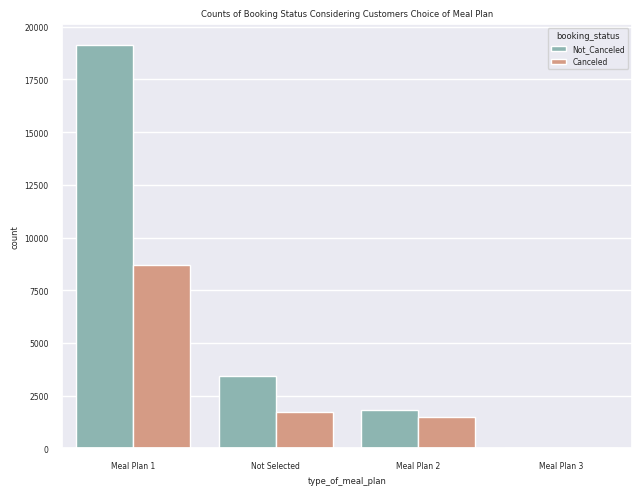

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Draw a countplot of booking status vs. type_of_meal_plan
sns.countplot(data = df, x = 'type_of_meal_plan', hue = 'booking_status',palette=['#86BCB6', '#e29578'])
plt.tight_layout()
plt.title('Counts of Booking Status Considering Customers Choice of Meal Plan')
plt.show()

# A very large portion of customers chose Meal Plan 1 (nearly one third of them canceled the booking)
# Only 5 customers chose Meal Plan 3 (1 of them canceled the booking)

The most common choice for mean plan is meal plan 1, with nearly one-third of these bookings being canceled. This is followed by bookings with no meal plan and meal plan 2. Meal plan 3 was selected by only five customers, and one of them canceled their booking. In the case of bookings that opted for meal plan 2, the number of cancellations and non-cancellations is fairly balanced.

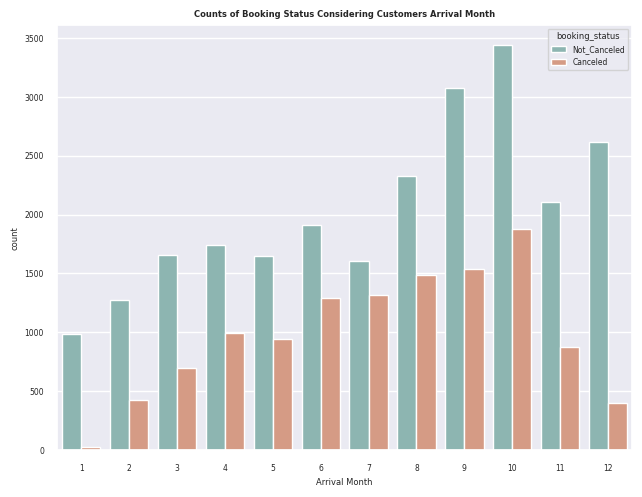

In [ ]:
# Draw a countplot of booking status vs. arrival_month
sns.countplot(data = df, x = 'arrival_month', hue = 'booking_status', palette=['#86BCB6', '#e29578'])
plt.tight_layout()
plt.title('Counts of Booking Status Considering Customers Arrival Month', weight = 'bold')
plt.xlabel('Arrival Month')

plt.show()

September and October have a higher volume of bookings, but they also experience a relatively high rate of cancellations. Conversely, bookings made in December appear to have a lower number of cancellations.

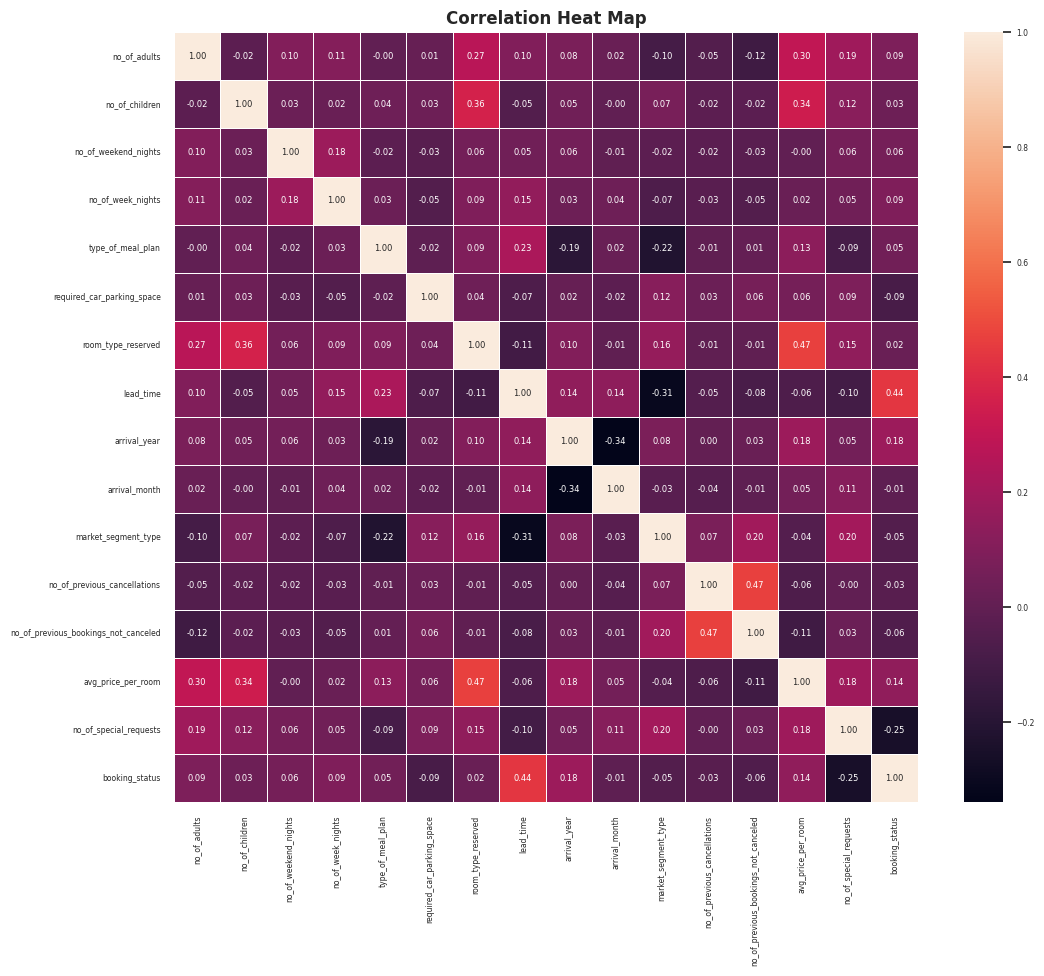

In [ ]:
# check the correlation between variables
plt.figure(figsize = (12,10))
sns.set(font_scale=0.5)
corr_matrix = df_encode.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidth=.5)
plt.title('Correlation Heat Map', fontsize = 12, weight = 'bold')

plt.show()

All variables have low correlation with others.

# Modeling

We use Hotel Reservation data provided on: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

**Variables:**
- booking_status (outcome): cancelled, not cancelled
- number of adults
- number of childres
- number of weekends
- number of week nights
- type of meal plan: meal plan 1, meal plan 2, meal plan 3, not selected
- room type: room type 1 to 6
- lead time: number of days between booking date and the arrival date
- booking month
- average price per room per night


## Model 1: Baseline

In [ ]:
# separate the variable as independent variables and outcome
X=df_encode.drop('booking_status',axis=1)
y=df_encode['booking_status']

from sklearn.model_selection import train_test_split
# Split the test and traning set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify= y, random_state = 80)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fit the baseline model
lr = LogisticRegression().fit(x_train, y_train)
pred = lr.predict(x_test)
# calculate the accuacry score for test set
accuracy = accuracy_score(y_test, pred)

# get the confusion matrix of the model
cf_lr = confusion_matrix(y_test, pred)
# get the model result.
report_lr = classification_report(y_test, pred)

print(f"Accuracy Score of Logistic Regression is : {accuracy}")
print(f"Classification Report : \n{report_lr}")

Accuracy Score of Logistic Regression is : 0.7877325982081324
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4878
           1       0.72      0.57      0.64      2377

    accuracy                           0.79      7255
   macro avg       0.77      0.73      0.74      7255
weighted avg       0.78      0.79      0.78      7255



In [ ]:
# predict based on the training set
pred_train = lr.predict(x_train)
# calculate the accuracy for the training set
accuracy_train = accuracy_score(y_train, pred_train)

print(f"Accuracy Score of Logistic Regression training set is : {accuracy_train}")
print(f"Accuracy Score of Logistic Regression testing set is : {accuracy}")

Accuracy Score of Logistic Regression training set is : 0.7915230875258442
Accuracy Score of Logistic Regression testing set is : 0.7877325982081324


Both accuracy scores yield the similar results, thus the model is not overfitting.

In [ ]:
from sklearn import metrics
y_pred_proba1 = lr.predict_proba(x_test)[::,1]

# calculate AUC of model
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)

# print AUC score
print(f"The AUC (area under curve) for this model is {auc1:.4f}")

The AUC (area under curve) for this model is 0.8415


The aim of the study is to accurately predict which reservations will be canceled. Therefore, we choose precision the preferred metric for assessing model accuracy and seek a model that minimizes false positive and ensures high precision.

## Model Tunning:  `saga`, `liblinear` with penalities `l1`

In [ ]:
# fit log model with sag liblinear and l1 penality
results = []
solvers = ['liblinear', 'saga']

for C in [0.0001, 0.001, 0.01, 0.05,0.1,0.5,1]:
  for solver in solvers:
    lr = LogisticRegression(solver=solver, penalty='l1', C=C, max_iter=10000).fit(x_train, y_train)
    pred = lr.predict(x_test)

    # Calculate the accuracy score for the test set
    accuracy = accuracy_score(y_test, pred)

    # Get the confusion matrix of the model
    cf_lr = confusion_matrix(y_test, pred)

    # Get the model result.
    report_lr = classification_report(y_test, pred)

    # Calculate the variance
    var = np.var(pred)
    # calculate the bias
    bias = np.mean(np.power((y_test-pred),2))

    results.append({
            "Solver": solver,
            "C": C,
            "Accuracy": round(accuracy,4),
            "Bias": round(bias,6),
            "Variance": round(var,6),
        })


    print(f"Solver: {solver}, Penalty: l1, C:{C}")
    print(f"Accuracy Score of Logistic Regression is: {accuracy}")
    print(f"Variance of Logistic Regression model is: {var:.2f}")
    print(f"Bias of Logistic Regression model is: {bias:.2f}")
    print(f"Classification Report:\n{report_lr}")
    print("Confusion Matrix:\n", cf_lr)
    print("\n" + "="*50 + "\n")

Solver: liblinear, Penalty: l1, C:0.0001
Accuracy Score of Logistic Regression is: 0.7616815988973122
Variance of Logistic Regression model is: 0.16
Bias of Logistic Regression model is: 0.24
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      4878
           1       0.72      0.45      0.55      2377

    accuracy                           0.76      7255
   macro avg       0.75      0.68      0.70      7255
weighted avg       0.75      0.76      0.74      7255

Confusion Matrix:
 [[4457  421]
 [1308 1069]]


Solver: saga, Penalty: l1, C:0.0001
Accuracy Score of Logistic Regression is: 0.7616815988973122
Variance of Logistic Regression model is: 0.16
Bias of Logistic Regression model is: 0.24
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      4878
           1       0.72      0.45      0.55      2377

    accuracy                        

In [ ]:
# transform results as dataframe
modelres = pd.DataFrame(results)
modelres

Solver       C  Accuracy      Bias  Variance
0   liblinear  0.0001    0.7617  0.238318  0.163196
1        saga  0.0001    0.7617  0.238318  0.163359
2   liblinear  0.0010    0.7728  0.227154  0.172285
3        saga  0.0010    0.7717  0.228256  0.172439
4   liblinear  0.0100    0.7881  0.211854  0.190915
5        saga  0.0100    0.7859  0.214059  0.186549
6   liblinear  0.0500    0.7892  0.210751  0.194867
7        saga  0.0500    0.7881  0.211854  0.187930
8   liblinear  0.1000    0.7897  0.210338  0.195448
9        saga  0.1000    0.7890  0.211027  0.187930
10  liblinear  0.5000    0.7898  0.210200  0.195641
11       saga  0.5000    0.7891  0.210889  0.188136
12  liblinear  1.0000    0.7901  0.209924  0.195770
13       saga  1.0000    0.7894  0.210613  0.188136

In [ ]:
# Since model with solver `saga` and `l1` penalty c=1 has relative low bias and variance, also higher true positive
# we select this model as the current best one
lr_l1 = LogisticRegression(solver='saga', penalty='l1', C = 1, max_iter=10000).fit(x_train, y_train)
pred = lr_l1.predict(x_test)

# Calculate the accuracy score for the test set
accuracy = accuracy_score(y_test, pred)

# Get the confusion matrix of the model
cf_lr_l1 = confusion_matrix(y_test, pred)

# Get the model result.
report_lr_l1 = classification_report(y_test, pred)

# calculate the bias and variance
var = np.var(pred)
bias = np.mean(np.power((y_test-pred),2))

print(f"Solver: 'saga', Penalty: l1, C = 1")
print(f"Accuracy Score of Logistic Regression is: {accuracy}")
print(f"Variance of Logistic Regression model is: {var:.2f}")
print(f"Bias of Logistic Regression model is: {bias:.2f}")
print(f"Classification Report:\n{report_lr_l1}")
print("Confusion Matrix:\n", cf_lr_l1)

Solver: 'saga', Penalty: l1, C = 1
Accuracy Score of Logistic Regression is: 0.7893866299104066
Variance of Logistic Regression model is: 0.19
Bias of Logistic Regression model is: 0.21
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4878
           1       0.73      0.56      0.64      2377

    accuracy                           0.79      7255
   macro avg       0.77      0.73      0.74      7255
weighted avg       0.78      0.79      0.78      7255

Confusion Matrix:
 [[4391  487]
 [1041 1336]]


- The `saga` solver with an `l1` penalty yields better precision for canceled cases compared to the baseline model.
- Testing 14 different solver, penalty and C value combinations results in a minor increase in precision for canceled cases, from 0.72 to 0.73 and the relatively small variance and bias values, which is achieved by the model using the `saga` solver with `l1` penalty and default value of C (C=1).
- The current best model choice is the one using the `saga` solver and `l1` penalty.

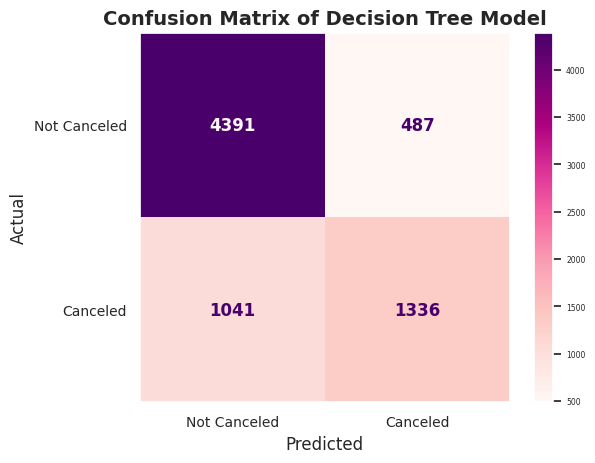

In [ ]:
# change label names
labels = ['Not Canceled','Canceled']

# visualize confusion matrix results
disp = ConfusionMatrixDisplay(confusion_matrix=cf_lr_l1,
                              display_labels=labels)

# set the text properties
text_props = {'fontsize': 12, 'weight': 'bold'}
disp.plot(cmap="RdPu", text_kw=text_props)

# remove grid lines
plt.grid(False)
# change name of x-axis label
plt.xlabel('Predicted', fontsize=12)
# change name of y-axis label
plt.ylabel('Actual', fontsize=12)
# Add title
plt.title('Confusion Matrix of Decision Tree Model', weight='bold', fontsize=14)

# Set custom x-axis ticks with fontsize
plt.xticks(np.arange(2), labels, fontsize=10)
# Set custom y-axis ticks with fontsize
plt.yticks(np.arange(2), labels, fontsize=10)


plt.show()

**Model Accuracy Explanation**
- Based on the results from the Confusion Matrix, the model correctly predicts 4,391 instances of cases that are not canceled and 1,339 instances of canceled cases that are indeed canceled.

- 0.73 Precision for cancelled cases: The model is correct 73% of the time when predicting a cancelled bookings.
- 0.81 Presicion for non-cancelled cases: The model is correct 81% of the time when predicting a non-cancelled bookings.




In [ ]:
# use model to predict probability that given y value is 1
y_pred_proba = lr_l1.predict_proba(x_test)[::,1]

# calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# print AUC score
print(f"The AUC (area under curve) for the tunned model is {auc:.4f}")
print(f"The AUC (area under curve) for the baseline model is {auc1:.4f}")


The AUC (area under curve) for the tunned model is 0.8411
The AUC (area under curve) for the baseline model is 0.8415


The relatively high AUC value suggests that the model is likely to effectively distinguish between canceled and non-canceled cases. It has a strong ability to detect a higher number of true positives and true negatives compared to false negatives and false positives.

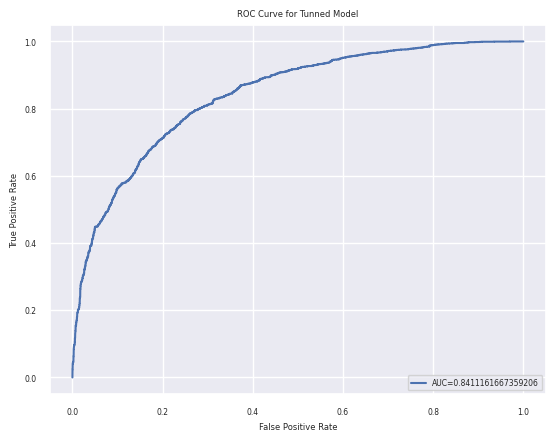

In [ ]:
# calculate the false positive and true positive rates for tunned model
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve for tunned model
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.title('ROC Curve for Tunned Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()



## Bias Variance Tradeoff

In [ ]:
print(f"Bias: {bias}")
print(f"Variance: {var}")

Bias: 0.21061337008959338
Variance: 0.18813586580418645


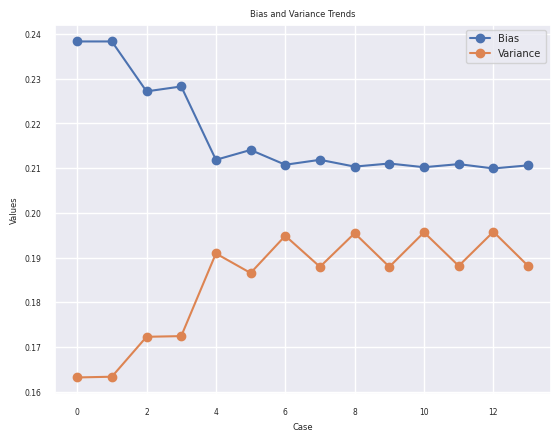

In [ ]:
# Plot Bias-Variance

bias = modelres['Bias']
variance = modelres['Variance']

# Create a line plot for bias
plt.plot(bias, label='Bias', marker='o', linestyle='-')

# Create a line plot for variance
plt.plot(variance, data = modelres, label='Variance', marker='o', linestyle='-')

# Customize the plot with labels and title
plt.xlabel('Case')
plt.ylabel('Values')
plt.title('Bias and Variance Trends')

# Add a legend to distinguish the lines
plt.legend(fontsize='large')

# Show the plot
plt.show()

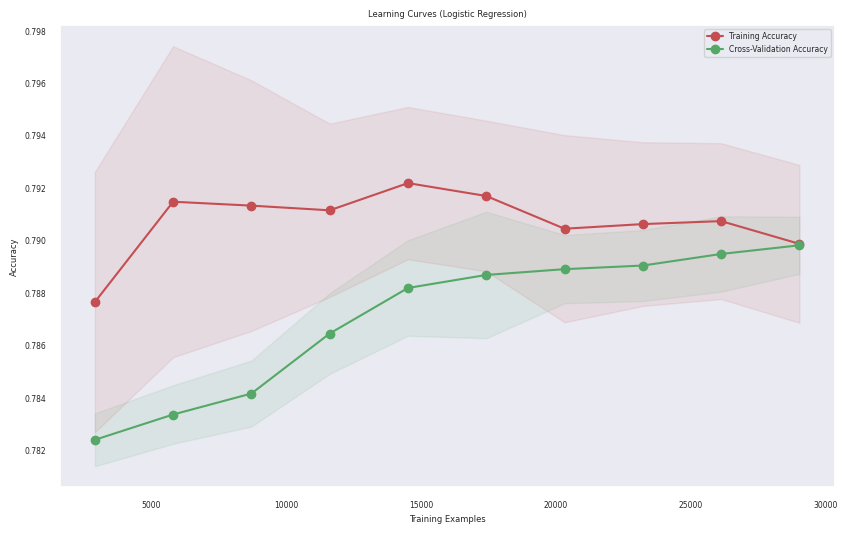

In [ ]:
from sklearn.model_selection import learning_curve


## Define training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, train_sizes=train_sizes, cv=5)


# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot training accuracy
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Accuracy")

# Plot cross-validation accuracy
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Accuracy")

plt.legend(loc="best")
plt.show()

Train_sizes is an array that defines the proportion of the training dataset that will be used for training. In this case, we generate learning curves for 10 different training set sizes ranging from 10% (0.1) to 100% (1.0) of the total dataset size.

The training accuracy line does the best when the number of our training examples is 5000, with the highest accuracy 0.80. And the cross-validation accuracy does the best when the sample number reaches maximum. The joint point shows when the example size is 29020, training accuracy and cross-validation accuracy share the same value (around 0.79).

The shaded area around the training accuracy mean line (represented by red dots and lines) represents the standard deviation of training scores at each training set size. In other words, it shows how much the training accuracy varies across different cross-validation folds (or different subsets of the training data) when we use the same training set size.

A wider shaded area suggests that the model's performance is less consistent when trained on different subsets of the training data.

The shaded area around the cross-validation accuracy mean line (represented by green dots and lines) represents the standard deviation of cross-validation scores at each training set size. It shows how much the cross-validation accuracy varies when we evaluate the model on different validation sets, keeping the training set size constant.

A wider shaded area around the cross-validation accuracy indicates that the model's performance varies more when tested on different validation sets, which can be an indication of the model's robustness.

If the shaded areas are narrow, it suggests that the model's performance is consistent across different subsets of the data, which is a positive sign. On the other hand, if the shaded areas are wide, it may indicate that the model's performance is sensitive to the specific data used, which could be a sign of overfitting or underfitting.

In [ ]:
from scipy.optimize import minimize

# Direct Optimization
# Define the logistic regression cost function with L1 regularization
def logistic_reg(theta, X, y, C):
    m = len(y)
    h = 1 / (1 + np.exp(-X.dot(theta)))
    l1 = np.sum(np.abs(theta))
    J = -(C / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + l1
    return J

# Same hyperparameters
C = 1
x_train_n = np.hstack([np.ones((x_train.shape[0], 1)), x_train])

# Initialize theta with the intercept term
theta_initial =[0.0001]*16


# Minimize the cost function
sol = minimize(logistic_reg, theta_initial, args=(x_train_n, y_train, C), method='SLSQP', options={'maxiter': 1000})

# Recall Scikit-learn Logistic Regression
lr_l1 = LogisticRegression(solver='saga',C=C, penalty='l1').fit(x_train, y_train)


# Result Comparison

In [ ]:
# Compare confusion_matrix for two methods
y_pred_opt = (x_test@ sol.x[1:].T > 0).astype(int)

cf_opt = confusion_matrix(y_test, y_pred_opt)
print("confusion matrix in test dataset from scikit-learn module:", cf_lr_l1)
print("confusion matrix in test dataset from optimization problem:", cf_opt)


confusion matrix in test dataset from scikit-learn module: [[4391  487]
 [1041 1336]]
confusion matrix in test dataset from optimization problem: [[4401  477]
 [1266 1111]]


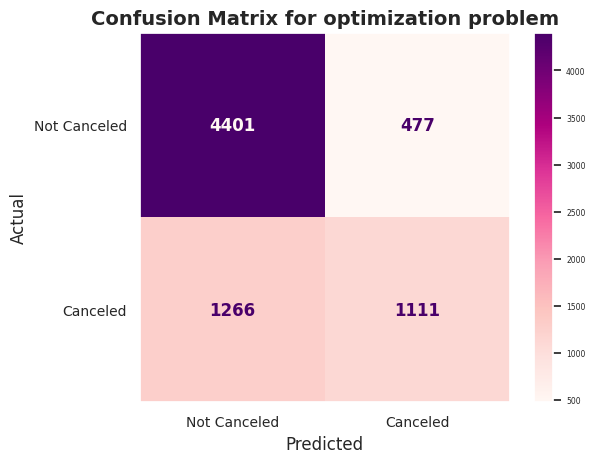

In [ ]:
# Visualize confusion_matrix for optimization problem
labels = ['Not Canceled','Canceled']

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_opt),
                              display_labels=labels)

# set the text properties
text_props = {'fontsize': 12, 'weight': 'bold'}
disp.plot(cmap="RdPu", text_kw=text_props)

# remove grid lines
plt.grid(False)
# change name of x-axis label
plt.xlabel('Predicted', fontsize=12)
# change name of y-axis label
plt.ylabel('Actual', fontsize=12)
# Add title
plt.title('Confusion Matrix for optimization problem', weight='bold', fontsize=14)

# Set custom x-axis ticks with fontsize
plt.xticks(np.arange(2), labels, fontsize=10)
# Set custom y-axis ticks with fontsize
plt.yticks(np.arange(2), labels, fontsize=10)


plt.show()

We use the minimize function from scipy.optimize to directly optimize the logistic regression cost function with L1 regularization. We choose the hyperparameter C=1 as same as that of scikit_learn model.

We then compare the confusion matrix of both methods. The result shows they are almost equal.